In [94]:
import pandas as pd
# from re import match
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
df = pd.read_csv('Data/d54b9e5f-c9d1-47bc-befb-e2e2184bdd4e_Data.csv').dropna()
num_cols = ['gdp_nom', 'growth', 'gpd_ppp']
df.columns = ['country', 'country_code'] + num_cols

brics_lst = ['Brazil','China','India','Russian Federation','South Africa']
brics = df[df.country.isin(brics_lst)].reset_index(drop=True)
brics[num_cols] = brics[num_cols].astype(float)

nato_lst = ['Albania','Belgium','Bulgaria','Canada','Croatia','Czech Republic','Denmark','Estonia','France','Germany','Greece','Hungary','Iceland','Italy','Latvia','Lithuania','Luxembourg','Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','Slovak Republic','Slovenia','Spain','Turkey','United Kingdom','United States']
nato = df[df.country.isin(nato_lst)].reset_index(drop=True)
nato[num_cols] = nato[num_cols].astype(float)

nato


,country,country_code,gdp_nom,growth,gpd_ppp
0,Albania,ALB,1.488763e+10,-3.955398,3.813832e+10
1,Belgium,BEL,5.218613e+11,-5.659660,6.128719e+11
2,Bulgaria,BGR,6.988935e+10,-4.387150,1.706727e+11
3,Canada,CAN,1.645423e+12,-5.233024,1.771474e+12
4,Croatia,HRV,5.720378e+10,-8.099761,1.167282e+11
5,Czech Republic,CZE,2.453393e+11,-5.797814,4.451167e+11
6,Denmark,DNK,3.560849e+11,-2.062125,3.512250e+11
7,Estonia,EST,3.065029e+10,-2.951069,5.004853e+10
8,France,FRA,2.630318e+12,-7.855256,3.166262e+12
9,Germany,DEU,3.846414e+12,-4.569617,4.560920e+12


In [28]:
nato[num_cols].sum().apply(lambda e: f'{e:,.0f}')


gdp_nom    40,076,762,298,612
growth                   -156
gpd_ppp    46,764,939,618,556
dtype: object

In [32]:
brics[num_cols].sum().apply(lambda e: f'{e:,.0f}')

brics


,country,country_code,gdp_nom,growth,gpd_ppp
0,Brazil,BRA,1.444733e+12,-4.059048,3.153407e+12
1,China,CHN,1.472273e+13,2.347514,2.428317e+13
2,India,IND,2.660245e+12,-7.251755,8.975477e+12
3,Russian Federation,RUS,1.483498e+12,-2.951274,4.367292e+12
4,South Africa,ZAF,3.354421e+11,-6.431975,7.923981e+11


In [122]:
df = pd.read_csv('Data/6c06842a-443e-4f05-982a-8cd49bcb3c7d_Data.csv').dropna()\
    .drop(columns=['Country Code']).rename(columns={'Country Name': 'country'})
num_cols = ['gdp_nom', 'gdp_growth', 'gdp_ppp']

df = df.melt(id_vars = 'country')

df['year'] = df.variable.apply(lambda e: e[:4]).astype(int)
df.variable = df.variable.str.replace('.*GDP \(current US\$\).*', 'gdp_nom', regex=True)\
    .str.replace('.*GDP, PPP.*', 'gdp_ppp', regex=True)\
    .str.replace('.*GDP growth.*', 'gdp_growth', regex=True)

df = df.pivot(['country', 'year'], 'variable', 'value').reset_index()
df = df[(
    (df.year >= 2000)
    & (df.country.isin(brics_lst + nato_lst))
)].sort_values('year').reset_index(drop=True)
df[num_cols] = df[num_cols].astype(float)

brics = df[df.country.isin(brics_lst)]
brics = brics.groupby('year').agg({
    'gdp_nom': sum,
    'gdp_ppp': sum
})

nato = df[df.country.isin(nato_lst)]
nato = nato.groupby('year').agg({
    'gdp_nom': sum,
    'gdp_ppp': sum
})

df = brics.join(nato, lsuffix='_brics', rsuffix='_nato').reset_index()

# def null_ellipse(e):
#     try:
#         return float(e)
#     except:
#         return None
    
# x.gdp_growth = x.gdp_growth.apply(null_ellipse)
# x.gdp_nom = x.gdp_nom.apply(null_ellipse)
# x.gdp_ppp = x.gdp_ppp.apply(null_ellipse)


df = df.melt(id_vars = ['year'])

df.variable = df.variable.str.rsplit('_', n=1)
df['Bloc'] = df.variable.apply(lambda e: e[1]).str.upper()
df.variable = df.variable.apply(lambda e: e[0])

df = df.pivot(['Bloc', 'year'], 'variable', 'value').sort_values('Bloc', ascending=False).reset_index()

df


variable,Bloc,year,gdp_nom,gdp_ppp
0,NATO,2000,1.968282e+13,2.222680e+13
1,NATO,2001,2.005274e+13,2.312956e+13
2,NATO,2003,2.393897e+13,2.496771e+13
3,NATO,2004,2.666439e+13,2.649521e+13
4,NATO,2005,2.836051e+13,2.798876e+13
5,NATO,2006,3.025936e+13,3.010154e+13
6,NATO,2007,3.342842e+13,3.177427e+13
7,NATO,2008,3.517964e+13,3.294642e+13
8,NATO,2009,3.267738e+13,3.228171e+13
9,NATO,2010,3.349760e+13,3.359422e+13


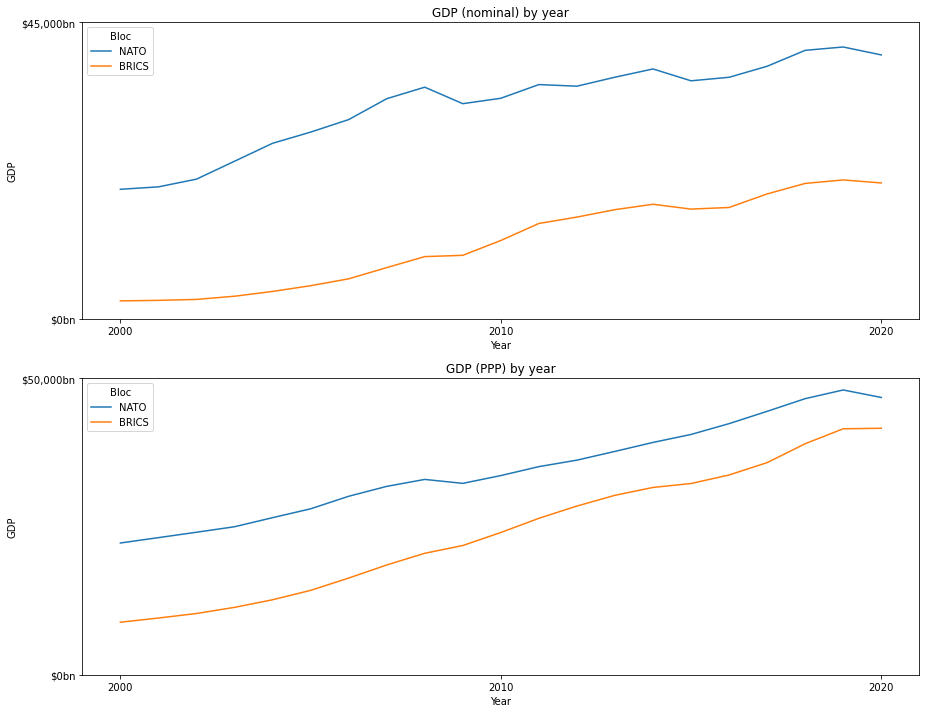

In [136]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
titles = {
    'gdp_nom': 'GDP (nominal)',
    'gdp_ppp': 'GDP (PPP)',

}

for i, e in enumerate(['gdp_nom', 'gdp_ppp']):
    ax = axes[i]
    sns.lineplot(x='year', y=e, hue='Bloc', data=df, ax=ax)
    ax.set_title(f'{titles[e]} by year')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP')
    ax.set_xticks([2000, 2010, 2020])
    ax.set_ylim(0)
    yticks = ax.get_yticks()
    yticks = [yticks[0], yticks[-1]]
    ax.set_yticks(yticks)
    yticks = [f'${e/1_000_000_000:,.0f}bn' for e in yticks]
    ax.set_yticklabels(yticks)





plt.show()
    

['$0', '$50,000,000,000,000']